# Ejercicio 3: La Encuesta de Viajes (Origen-Destino) de Santiago, 2012

La Encuesta Origen-Destino de Santiago, efectuada por última vez el año 2012, es el instrumento principal que utilizan las autoridades para tomar decisiones respecto a transporte en la ciudad. Consistió en entrevistar a los residentes de más de 18000 hogares haciéndoles la siguiente pregunta:

![](http://img.emol.com/2012/06/29/encuesta-transportes_134630.jpg)

(imagen de [EMOL: Lanzan encuesta que mide cambios en formas de movilizarse en la RM en últimos 10 años](http://www.emol.com/noticias/nacional/2012/06/29/548217/lanzan-encuesta-que-mide-cambios-en-formas-de-movilizarse-en-la-rm-en-ultima-decada.html))

**¿Cuáles viajes hiciste ayer?**

Las personas encuestadas responden a través de un _diario de viaje_. En este diario incluyen todos los datos pertinentes de sus viajes: a qué hora lo iniciaron, a qué hora terminaron, los puntos de origen y destino (coordenadas), el propósito del viaje, el/los modo(s) de viaje utilizados, etc. También incluye información socio-demográfica de cada persona que responde.

La encuesta es representativa a nivel comunal. Esto quiere decir que podemos sacar conclusiones sobre como se moviliza la población de Providencia, pero no de un barrio específico de la comuna. Puede ser que exista información de ese barrio específico, pero no podemos sacar conclusiones extrapolables al barrio completo.

En este ejercicio cargaremos datos de la encuesta, que está disponible en el [Portal de Datos del Gobierno](http://datos.gob.cl/dataset/31682) en un DataFrame de pandas. 

## Importación de Bibliotecas Necesarias

Usualmente se cargan todos los módulos y bibliotecas en el comienzo del programa. Esto permite conocer rápidamente los requerimientos que tiene y también tener una idea de lo que se hará.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize

# esto le indica a Jupyter que los gráficos generados se desplieguen dentro del notebook
%matplotlib inline

# esto configura la apariencia de los gráficos
sns.set(context='poster', font='Roboto', font_scale=1.1, style='white', palette='plasma')

También se indican variables de configuración que puedan ser relevantes.

Por ejemplo, la variable `path` indica la carpeta en la que tenemos la encuesta origen-destino.

In [2]:
path = './origen_destino_stgo_2012/EOD_STGO'

## Archivos de la Encuesta

Veamos qué archivos incluye la encuesta. Éstos son los archivos principales, que contienen la información de los viajes, hogares, y personas:

In [3]:
!ls -lh ./origen_destino_stgo_2012/EOD_STGO/

total 46M
-rw-rw-r-- 1 egraells egraells 2,6M ago  8 14:20 DistanciaViaje.csv
-rw-rw-r-- 1 egraells egraells 756K ago  8 14:20 Edadpersonas.csv
-rw-rw-r-- 1 egraells egraells  17M ago  8 14:20 Etapas.csv
-rw-rw-r-- 1 egraells egraells 2,0M ago  8 14:20 Hogares.csv
-rw-rw-r-- 1 egraells egraells 6,6M ago  8 14:20 personas.csv
drwxrwxr-x 2 egraells egraells 4,0K jun 15 14:12 Tablas_parametros
-rw-rw-r-- 1 egraells egraells 410K ago  8 14:20 Vehiculo.csv
-rw-rw-r-- 1 egraells egraells  16M ago  8 14:20 viajes.csv
-rw-rw-r-- 1 egraells egraells 1,6M ago  8 14:20 ViajesDifusion.csv


In [4]:
!head ./origen_destino_stgo_2012/EOD_STGO/viajes.csv

Observamos que en el archivo `viajes.csv` cada viaje es una fila, y cada campo está compuesto por números. Estos números no siempre son el dato final, por ejemplo, las comunas de origen y destino tienen un número y no sus nombres. La manera de decodificar esos números es leer los archivos que están en la carpeta `Tablas_parametros`:

In [5]:
!ls -lh ./origen_destino_stgo_2012/EOD_STGO/Tablas_parametros/

total 504K
-rw-rw-r-- 1 egraells egraells  140 ago  8 14:20 Actividad.csv
-rw-rw-r-- 1 egraells egraells  175 ago  8 14:20 ActividadDestino.csv
-rw-rw-r-- 1 egraells egraells  126 ago  8 14:20 ActividadEmpresa.csv
-rw-rw-r-- 1 egraells egraells   28 ago  8 14:20 AdultoMayor.csv
-rw-rw-r-- 1 egraells egraells  235 ago  8 14:20 Autopista.csv
-rw-rw-r-- 1 egraells egraells  156 ago  8 14:20 CirculacionBicicleta.csv
-rw-rw-r-- 1 egraells egraells  232 ago  8 14:20 CodigoTiempo.csv
-rw-rw-r-- 1 egraells egraells   82 ago  8 14:20 Combustible.csv
-rw-rw-r-- 1 egraells egraells 1,4K ago  8 14:20 Comuna.csv
-rw-rw-r-- 1 egraells egraells 1,4K ago  8 14:20 Comunas.csv
-rw-rw-r-- 1 egraells egraells   36 ago  8 14:20 ConoceSantiago.csv
-rw-rw-r-- 1 egraells egraells  156 ago  8 14:20 Discapacidad.csv
-rw-rw-r-- 1 egraells egraells  209 ago  8 14:20 Donde Estudia.csv
-rw-rw-r-- 1 egraells egraells   96 ago  8 14:20 EdadVehiculo.csv
-rw-rw-r-- 1 egraells egraells   67 ago  8 14:20 EstacionaBicicle

In [6]:
!head ./origen_destino_stgo_2012/EOD_STGO/Tablas_parametros/Comuna.csv

Id,Comuna
10,CALAMA
13,COPIAPÓ
19,LA SERENA
21,COQUIMBO
25,OVALLE
32,SALAMANCA
34,VALPARAISO
35,QUINTERO
36,PUCHUNCAVI


Como vemos, el archivo `Comuna.csv` contiene la conversión de los números en las columnas `ComunaOrigen` y `ComunaDestino` de `viajes.csv`. Si en los viajes dice `ComunaOrigen: 35`, entonces el viaje se originó Quintero.

### Personas

Comencemos a leer los datos de la encuesta. Para eso utilizaremos el método llamado `read_csv` que tiene `pandas`. Este método genera un `DataFrame` a partir de un archivo de texto como los que vienen en la encuesta. Noten que debemos ayudar a `pandas` a entender la estructura del archivo: 

  * cuál es el carácter que separa los campos (en este caso, `;`).
  * cuál es el carácter que separa decimales (en este caso, `,`).
  * cuál es la codificación de texto del archivo (`utf-8`, pero, si sus archivos son generados en Windows, usualmente es `iso-8859-1`).
  * cuál es la columna que utilizaremos como índice (`Persona`).

In [7]:
personas = pd.read_csv(path + '/personas.csv', sep=';', decimal=',', index_col=['Persona'], encoding='utf-8')

In [8]:
personas.head()

,Hogar,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,Curso,...,TramoIngreso,IngresoFinal,TramoIngresoFinal,IngresoImputado,Factor_LaboralNormal,Factor_SabadoNormal,Factor_DomingoNormal,Factor_LaboralEstival,Factor_FindesemanaEstival,Factor
Persona,,,,,,,,,,,,,,,,,,,,,
10001001,100010,1958,1,1,2,3,2,2,4.0,8.0,...,2,240000,2,0,NaN,NaN,1668.2600,NaN,NaN,82.58553
10001002,100010,1956,2,2,5,1,2,2,5.0,1.0,...,0,0,0,0,NaN,NaN,852.1137,NaN,NaN,99.53422
10001003,100010,1982,2,3,0,1,2,2,7.0,4.0,...,2,210845,2,2,NaN,NaN,1609.1630,NaN,NaN,151.59367
10002001,100020,1954,1,1,4,3,2,2,4.0,8.0,...,1,133000,1,0,169.50230,NaN,NaN,NaN,NaN,45.21325
10002002,100020,1961,2,2,2,1,2,2,4.0,8.0,...,1,193000,1,0,43.26765,NaN,NaN,NaN,NaN,25.62248


In [9]:
personas.columns

Index(['Hogar', 'AnoNac', 'Sexo', 'Relacion', 'Viajes', 'LicenciaConducir',
       'PaseEscolar', 'AdultoMayor', 'Estudios', 'Curso', 'Actividad',
       'Ocupacion', 'ActividadEmpresa', 'JornadaTrabajo', 'DondeEstudia',
       'DirActividadCoordX', 'DirActividadCoordY', 'DirEstudiosCoordX',
       'DirEstudiosCoordY', 'NoViaja', 'TarjetaBip', 'Tarjeta2Bip',
       'MedioViajeRestricion', 'ConoceTransantiago', 'NoUsaTransantiago',
       'Discapacidad', 'TieneIngresos', 'Ingreso', 'TramoIngreso',
       'IngresoFinal', 'TramoIngresoFinal', 'IngresoImputado',
       'Factor_LaboralNormal', 'Factor_SabadoNormal', 'Factor_DomingoNormal',
       'Factor_LaboralEstival', 'Factor_FindesemanaEstival', 'Factor'],
      dtype='object')

Podemos ver los valores específicos de una columna, y también aplicar el método `head`. Usaremos también el método `describe`, que muestra estadísticas básicas sobre la columna.

In [10]:
personas['AnoNac'].head()

Persona
10001001    1958
10001002    1956
10001003    1982
10002001    1954
10002002    1961
Name: AnoNac, dtype: int64

In [11]:
personas['AnoNac'].describe()

count    60054.000000
mean      1975.421920
std         22.189995
min       1904.000000
25%       1959.000000
50%       1977.000000
75%       1994.000000
max       2013.000000
Name: AnoNac, dtype: float64

Podemos hacer un histograma.

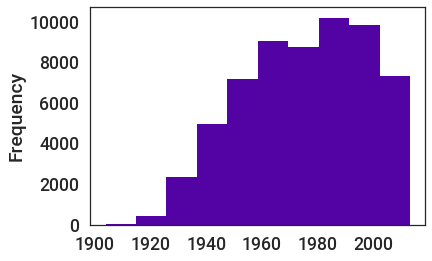

In [12]:
personas['AnoNac'].plot(kind='hist')

Uhm, pero son muy pocos `bins` (barras con inicio y fin en el eje x, utilizadas para contar los datos). Podemos utilizar el parámetro `bins` del método para configurar esto:

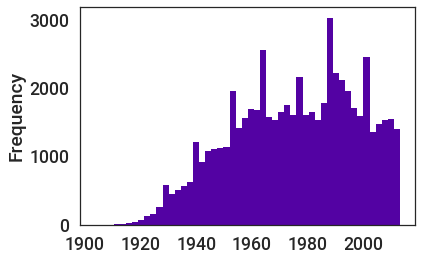

In [13]:
personas['AnoNac'].plot(kind='hist', bins=50)

Mucho mejor :)

Ahora bien, la columna de nacimiento era cuantitativa. Tiene sentido calcular estadística descriptiva. ¿Qué pasa con una columna cualitativa?

In [14]:
personas['Sexo'].head()

Persona
10001001    1
10001002    2
10001003    2
10002001    1
10002002    2
Name: Sexo, dtype: int64

Como vemos, `Sexo` tiene valores 1 y 2. Están codificados. 

Al tener números, es posible calcular la estadística descriptiva. Sin embargo, no tiene sentido hacerlo:

In [15]:
personas['Sexo'].describe()

count    60054.000000
mean         1.527509
std          0.499247
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: Sexo, dtype: float64

¿Qué significa que `Sexo` tenga valor promedio 1.52? Nada. 

Algo más útil es calcular las frecuencias de cada valor disponible en la columna. Lo podemos hacer con el método `value_counts`:

In [16]:
personas['Sexo'].value_counts()

2    31679
1    28375
Name: Sexo, dtype: int64

Ahora decodifiquemos los números de acuerdo a lo que dicen los archivos en las tablas de parámetros:

In [17]:
!head ./origen_destino_stgo_2012/EOD_STGO/Tablas_parametros/Sexo.csv

Podemos escribir una función que implemente esta asignación, y aplicarla a la columna a través del método `map`. Lo que hace `map` es ejecutar la función con cada fila de la columna como parámetro, y entregar el resultado como una columna nueva:

In [18]:
def decode_sex(number):
    if number == 1:
        return 'Hombre'
    elif number == 2:
        return 'Mujer'
    else:
        raise ValueError('Valor Inválido')

personas['Sexo'].head().map(decode_sex)

Persona
10001001    Hombre
10001002     Mujer
10001003     Mujer
10002001    Hombre
10002002     Mujer
Name: Sexo, dtype: object

Ahora bien, hay categorías que son más grandes que `Sexo`, y perderíamos tiempo escribiendo una función para cada caso. Podemos hacer una que funcione en general:

In [19]:
def decode_column(df, fname, col_name, index_col='Id', value_col=None, sep=';', encoding='utf-8'):
    '''
    param :df: DataFrame del que leeremos una columna.
    param :fname: nombre del archivo que contiene los valores a decodificar.
    param :col_name: nombre de la columna que queremos decodificar.
    param :index_col: nombre de la columna en el archivo @fname que tiene los índices que codifican @col_name
    param :value_col: nombre de la columna en el archivo @fname que tiene los valores decodificados
    param :sep: carácter que separa los valores en @fname. 
    param :encoding: identificación del _character set_ que utiliza el archivo. Usualmente es utf-8, si no funciona,
                     se puede probar con iso-8859-1.
    '''
    if value_col is None:
        value_col = 'value'
        
    values_df = pd.read_csv(fname, sep=sep, index_col=index_col, names=[index_col, value_col], header=0,
                            dtype={index_col: np.float64}, encoding=encoding)
    
    src_df = df.loc[:,(col_name,)]
    
    return src_df.join(values_df, on=col_name)[value_col]

In [20]:
decode_column(personas.head(), path + '/Tablas_parametros/Sexo.csv', 'Sexo')

Persona
10001001    Hombre
10001002     Mujer
10001003     Mujer
10002001    Hombre
10002002     Mujer
Name: value, dtype: object

Funciona :)

Lo que haremos ahora es guardar el resultado de decodificar la columna. Lo haremos asignando el resultado de la siguiente manera:

```python
dataframe[NOMBRE_NUEVA_COLUMNA] = decode_column(...)
```

En este caso utilizaremos el mismo nombre de la columna que estamos decodificando como nombre de columna final. Así, perdemos los datos anteriores (en este caso, `Sexo` codificado con números) pero eso no es problema porque no los necesitamos.

Hagámoslo ;)

In [21]:
personas['Sexo'] = decode_column(personas, path + '/Tablas_parametros/Sexo.csv', 'Sexo')
personas.Sexo.value_counts()

Mujer     31679
Hombre    28375
Name: Sexo, dtype: int64

In [22]:
personas['TramoIngreso'] = decode_column(personas, path + '/Tablas_parametros/TramoIngreso.csv', 'TramoIngreso')
personas.TramoIngreso.value_counts()

Entre 200.001 y 400.000 pesos        11389
Menos de 200.000 pesos                9382
No contesta                           7361
Entre 400.001 y 800.000 pesos         4538
Entre 800.001 y 1.600.000 pesos       1279
Entre 1.600.001 y 2.400.000 pesos      258
Más de 2.400.000 pesos                 177
Name: TramoIngreso, dtype: int64

In [23]:
personas['Relacion'] = decode_column(personas,path + '/Tablas_parametros/Relacion.csv', 'Relacion', value_col='relacion')
personas.Relacion.value_counts()

Hijo o Hija                       22225
Jefe(a) de Hogar                  18262
Cónyuge o pareja                  11435
Otro pariente                      7564
No familiar                         359
Trabajadora de casa particular      203
Pensionista                           6
Name: Relacion, dtype: int64

El método `value_counts` es muy útil. Aunque a veces uno quisiera visualizar los resultados en vez de imprimirlos en el notebook. Para ello podemos utilizar la función `sns.countplot`:

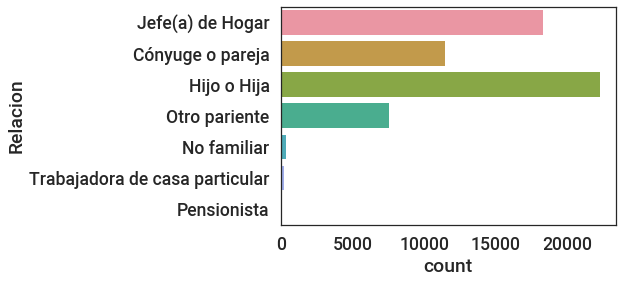

In [24]:
sns.countplot(y='Relacion', data=personas)

El método permite incluso anidar variables:

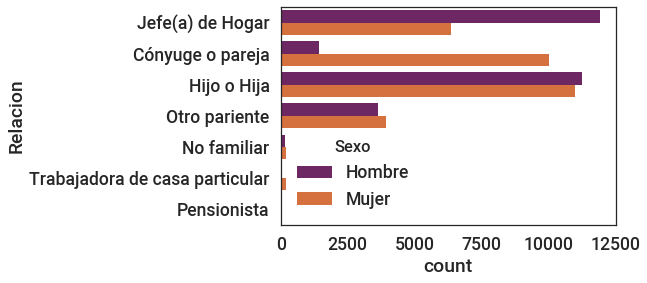

In [25]:
sns.countplot(y='Relacion', data=personas, hue='Sexo', palette='inferno')

Esto ya se ve más interesante, ¿no? Podemos empezar a _preguntar_ cosas a los datos. Por ejemplo, al combinar las variables `Relacion` y `Sexo` notamos que los hombres suelen ser los jefes de hogar.

Veamos otras variables.

In [26]:
personas['JornadaTrabajo'] = decode_column(personas, path + '/Tablas_parametros/JornadaTrabajo.csv', 'JornadaTrabajo', 
                                           value_col='jornada_trabajo')
personas.JornadaTrabajo.value_counts()

Jornada completa (40 o más horas semanales)                                    21934
Jornada parcial (menos de 40 horas semanales, excluye sólo fines de semana)     3180
Ocasional                                                                        346
Sólo fines de semana                                                             126
Name: JornadaTrabajo, dtype: int64

In [27]:
personas['Ocupacion'] = decode_column(personas, path + '/Tablas_parametros/Ocupacion.csv', 'Ocupacion', 
           value_col='ocupacion')
personas.Ocupacion.value_counts()

Empleado u obrero del sector privado                               17314
Trabajador por cuenta propia                                        4880
Enpleado u obrero de empresas públicas                               968
Servicio doméstico puertas afuera                                    745
Empleado u obrero del sector público (Gob. Central o Municipal)      672
Patrón o empleador                                                   613
Servicio doméstico puertas adentro                                   251
FF.AA. Y del Orden                                                   124
Familiar no remunerado                                                19
Name: Ocupacion, dtype: int64

A veces no solamente se quiere ver la cantidad de observaciones para una variable. También son de interés las diferencias en los promedios con sus respectivas varianzas. Para ello podemos utilizar la función `sns.factorplot`:

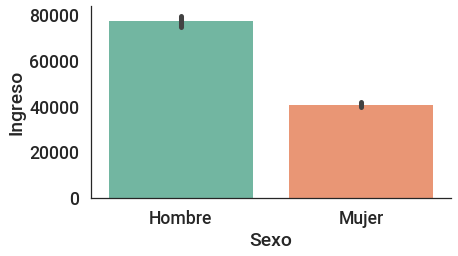

In [28]:
sns.factorplot(y='Ingreso', x='Sexo', data=personas, aspect=1.7, palette='Set2', kind='bar')

### Viajes

Ahora leamos la tabla de viajes. El proceso es análogo al de las personas.

In [29]:
viajes = pd.read_csv(path + '/viajes.csv', sep=';', decimal=',', index_col=['Viaje'])
viajes.head()

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,...,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo
Viaje,,,,,,,,,,,,,,,,,,,,,
1734310202,173431,17343102,1,94.0,94.0,2.0,2.0,400,407,335208.7188,...,3.0,6.0,6.0,1.0,1.000000,NaN,NaN,NaN,NaN,0.0
1734410101,173441,17344101,2,94.0,71.0,2.0,3.0,407,307,338536.4375,...,4.0,5.0,5.0,1.0,1.127220,NaN,NaN,NaN,NaN,0.0
1734410102,173441,17344101,2,71.0,94.0,3.0,2.0,307,407,354267.3438,...,3.0,5.0,10.0,2.0,1.127220,NaN,NaN,NaN,NaN,0.0
1734410301,173441,17344103,2,94.0,91.0,2.0,3.0,407,437,338536.4375,...,2.0,5.0,10.0,2.0,1.127220,NaN,NaN,NaN,NaN,0.0
1734410302,173441,17344103,2,91.0,94.0,3.0,2.0,437,407,350841.6563,...,5.0,4.0,10.0,2.0,1.052764,NaN,NaN,NaN,NaN,0.0


In [30]:
viajes.columns

Index(['Hogar', 'Persona', 'Etapas', 'ComunaOrigen', 'ComunaDestino',
       'SectorOrigen', 'SectorDestino', 'ZonaOrigen', 'ZonaDestino',
       'OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY',
       'Proposito', 'PropositoAgregado', 'ActividadDestino', 'MediosUsados',
       'ModoAgregado', 'ModoPriPub', 'ModoMotor', 'HoraIni', 'HoraFin',
       'HoraMedia', 'TiempoViaje', 'TiempoMedio', 'Periodo', 'MinutosDespues',
       'CuadrasDespues', 'FactorLaboralNormal', 'FactorSabadoNormal',
       'FactorDomingoNormal', 'FactorLaboralEstival',
       'FactorFindesemanaEstival', 'CodigoTiempo'],
      dtype='object')

In [31]:
viajes['ModoAgregado'] = decode_column(viajes, path + '/Tablas_parametros/ModoAgregado.csv', 'ModoAgregado', 
              index_col='ID', value_col='Modo')
viajes.ModoAgregado.value_counts()

Caminata                  33827
Auto                      26437
Bus TS                    18830
Bus TS - Metro             8434
Otros                      5169
Metro                      5000
Bicicleta                  3870
Taxi Colectivo             3533
Bus no TS                  3316
Taxi                       1662
Otros - Bus TS              731
Bus no TS - Metro           694
Taxi Colectivo - Metro      643
Otros - Bus TS - Metro      492
Auto - Metro                322
Bus TS - Bus no TS          296
Otros - Metro               210
Taxi - Metro                125
Name: ModoAgregado, dtype: int64

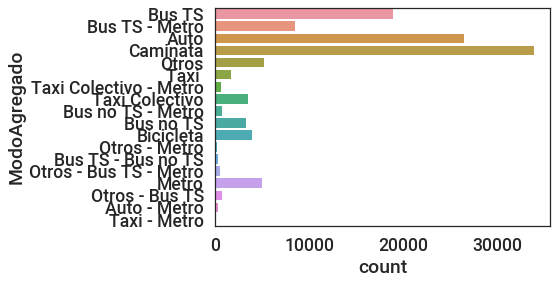

In [32]:
sns.countplot(y='ModoAgregado', data=viajes)

In [33]:
viajes['SectorOrigen'] = decode_column(viajes, path + '/Tablas_parametros/Sector.csv', 
                                       col_name='SectorOrigen', index_col='Sector', value_col='Nombre', sep=';')

In [34]:
viajes['SectorDestino'] = decode_column(viajes, path + '/Tablas_parametros/Sector.csv', 
                                       col_name='SectorDestino', index_col='Sector', value_col='Nombre', sep=';')

Digamos que solamente nos interesan los viajes _dentro_ de la ciudad. Para eso podemos filtrar los viajes cuyo sector sea externo o exterior:

In [35]:
viajes['SectorOrigen'].value_counts()

Oriente                   21006
Poniente                  20496
Sur                       19815
Sur-Oriente               18250
Norte                     14859
Centro                    10276
Extensión Sur-Poniente     6646
Exterior a RM               242
Name: SectorOrigen, dtype: int64

In [36]:
viajes['SectorDestino'].value_counts()

Oriente                   21036
Poniente                  20434
Sur                       19764
Sur-Oriente               18230
Norte                     14828
Centro                    10377
Extensión Sur-Poniente     6563
Exterior a RM               281
Name: SectorDestino, dtype: int64

El filtrado lo haremos así:

In [39]:
viajes = viajes[(viajes['SectorOrigen'] != 'Exterior a RM') 
                & (viajes['SectorDestino'] != 'Exterior a RM')
                & (viajes['SectorOrigen'] != 'Extensión Sur-Poniente') 
                & (viajes['SectorDestino'] != 'Extensión Sur-Poniente')]

Ahora sigamos cargando variables :)

In [40]:
viajes['Proposito'] = decode_column(viajes, path + '/Tablas_parametros/Proposito.csv', col_name='Proposito')
viajes.Proposito.value_counts()

volver a casa                   48511
Al trabajo                      16838
De compras                      10472
Al estudio                       7901
Trámites                         3904
Buscar o Dejar a alguien         3831
Visitar a alguien                3434
Recreación                       2897
De salud                         2065
Otra actividad (especifique)     1732
Por trabajo                      1554
Por estudio                       948
Comer o Tomar algo                657
Buscar o dejar algo               481
Name: Proposito, dtype: int64

In [42]:
viajes['ComunaOrigen'] = decode_column(viajes, path + '/Tablas_parametros/Comunas.csv', 'ComunaOrigen', 
                                       value_col='Comuna', sep=',')
viajes.ComunaOrigen.value_counts()

Santiago               10044
Maipú                   7900
Puente Alto             7698
Las Condes              6383
La Florida              5597
Providencia             5334
San Bernardo            5279
Ñuñoa                   3888
Pudahuel                3523
Quilicura               3364
Peñalolén               2417
La Pintana              2396
Recoleta                2353
El Bosque               2239
San Miguel              2179
Estación Central        2001
Colina                  1848
La Reina                1836
La Granja               1833
Vitacura                1825
Macul                   1760
Renca                   1661
Pedro Aguirre Cerda     1623
Conchalí                1558
Lo Barnechea            1550
San Joaquín             1478
La Cisterna             1456
Independencia           1452
Huechuraba              1415
Cerro Navia             1353
Quinta Normal           1323
Cerrillos               1236
Lo Prado                1184
Lampa                   1172
San Ramón     

In [43]:
viajes['ComunaDestino'] = decode_column(viajes, path + '/Tablas_parametros/Comunas.csv', 'ComunaDestino', 
                                       value_col='Comuna', sep=',')
viajes.ComunaDestino.value_counts()

Santiago               10134
Maipú                   7854
Puente Alto             7701
Las Condes              6360
La Florida              5585
Providencia             5403
San Bernardo            5304
Ñuñoa                   3882
Pudahuel                3514
Quilicura               3353
Peñalolén               2410
La Pintana              2378
Recoleta                2349
El Bosque               2239
San Miguel              2177
Estación Central        2026
Colina                  1852
La Reina                1833
La Granja               1819
Vitacura                1816
Macul                   1769
Renca                   1641
Pedro Aguirre Cerda     1599
Lo Barnechea            1543
Conchalí                1537
San Joaquín             1467
Independencia           1461
La Cisterna             1433
Huechuraba              1426
Cerro Navia             1347
Quinta Normal           1316
Cerrillos               1241
Lo Prado                1180
Lampa                   1164
San Ramón     

In [44]:
viajes['ActividadDestino'] = decode_column(viajes, path + '/Tablas_parametros/ActividadDestino.csv', 
                                           'ActividadDestino')
viajes.ActividadDestino.value_counts()

Servicios                                                       8098
Comercio                                                        3305
Industria                                                       2428
Otros                                                           1695
Educación                                                        845
Salud                                                            766
Habitacional (Ej. Servicio doméstico, enfermera a domicilio)     621
Sector público                                                   392
Name: ActividadDestino, dtype: int64

In [45]:
viajes['Periodo'] = decode_column(viajes, path + '/Tablas_parametros/Periodo.csv', 'Periodo', 
                                  sep=';', value_col='Periodos')
viajes.Periodo.value_counts()

Fuera de Punta 2 (9:01 - 10:00, 12:01 - 17:30, 20:31 - 23:00)    47817
Punta Tarde (17:31 - 20:30)                                      22109
Punta Mañana 2 (7:31 - 9:00)                                     15983
Fuera de Punta 1 (10:01 - 12:00)                                 11516
Punta Mañana 1 (6:01 - 7:30)                                      5577
Noche (23:01 - 06:00)                                             1968
Name: Periodo, dtype: int64

Una variable que no hemos visto es el tiempo:

In [47]:
viajes['HoraIni'].head()

Viaje
1734310202    22:30
1734410101    13:00
1734410102    22:00
1734410301     9:00
1734410302    19:00
Name: HoraIni, dtype: object

In [48]:
viajes['HoraIni'].describe()

count     105102
unique       994
top        18:00
freq        5502
Name: HoraIni, dtype: object

Nos damos cuenta que, aunque los datos _muestran_ la hora, no podemos realizar cálculos sobre ella. Para resolver este problema tenemos que convertir esta tabla a datos de tiempo. En particular utilizaremos lo que se llama `Timedelta` (o duración). Una duración puede codificar un tiempo (como la hora) pero sin indicar una fecha específica. Podemos hacer la conversión así:

In [49]:
def to_timedelta(value):
    try:
        parts = value.split(':')
        return pd.Timedelta(hours=int(parts[0]), minutes=int(parts[1]))
    except AttributeError:
        return pd.Timedelta(minutes=0)
        
viajes['HoraIni'].head().map(to_timedelta).describe()

count                         5
mean            0 days 17:06:00
std      0 days 05:53:56.948933
min             0 days 09:00:00
25%             0 days 13:00:00
50%             0 days 19:00:00
75%             0 days 22:00:00
max             0 days 22:30:00
Name: HoraIni, dtype: object

Vemos que ahora sí funciona, y podemos ver, por ejemplo, la hora promedio de inicio de viaje. No es algo que sirva de mucho, pero se puede.

In [50]:
viajes['HoraIni'] = viajes['HoraIni'].map(to_timedelta)
viajes['HoraFin'] = viajes['HoraFin'].map(to_timedelta)

Lo que sí podemos hacer es un histograma para ver la distribución de las horas de inicio de viaje.

In [51]:
viajes['HoraIni'].plot(kind='hist')

TypeError: Empty 'DataFrame': no numeric data to plot

¿Qué? Hubo una excepción que dice que no hay datos _numéricos_. Efectivamente podemos hacer cálculos sobre nuestros datos, pero los métodos de `pandas` para visualización no están preparados. Lo que sí podemos hacer es realizar cálculos que conviertan las duraciones a números. El siguiente ejemplo muestra como hacerlo:

(5, 24)

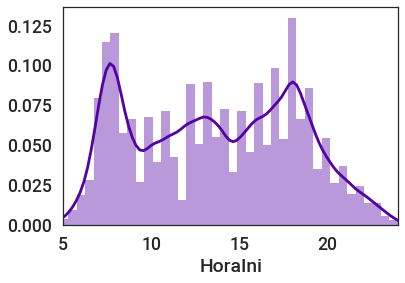

In [52]:
sns.distplot(viajes['HoraIni'] / pd.Timedelta(hours=1))
plt.xlim([5,24])

:D ¡Funciona! Y vemos que el método `distplot` no solamente muestra un histograma, sino que también calcula una distribución utilizando el método llamado [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

Guardemos los datos numéricos en una nueva columna para poder utilizarlos más tarde:

In [53]:
viajes['HoraDeInicio'] = viajes['HoraIni'] / pd.Timedelta(hours=1)

Ahora bien, el gráfico anterior muestra la distribución de hora de viaje para **todos** los viajes registrados. ¿Qué pasa si queremos desagregarlos por alguna variable de interés? En el siguiente ejemplo utilizamos una [Grilla de Facetas](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) para mostrar las distintas desagregaciones que hagamos:

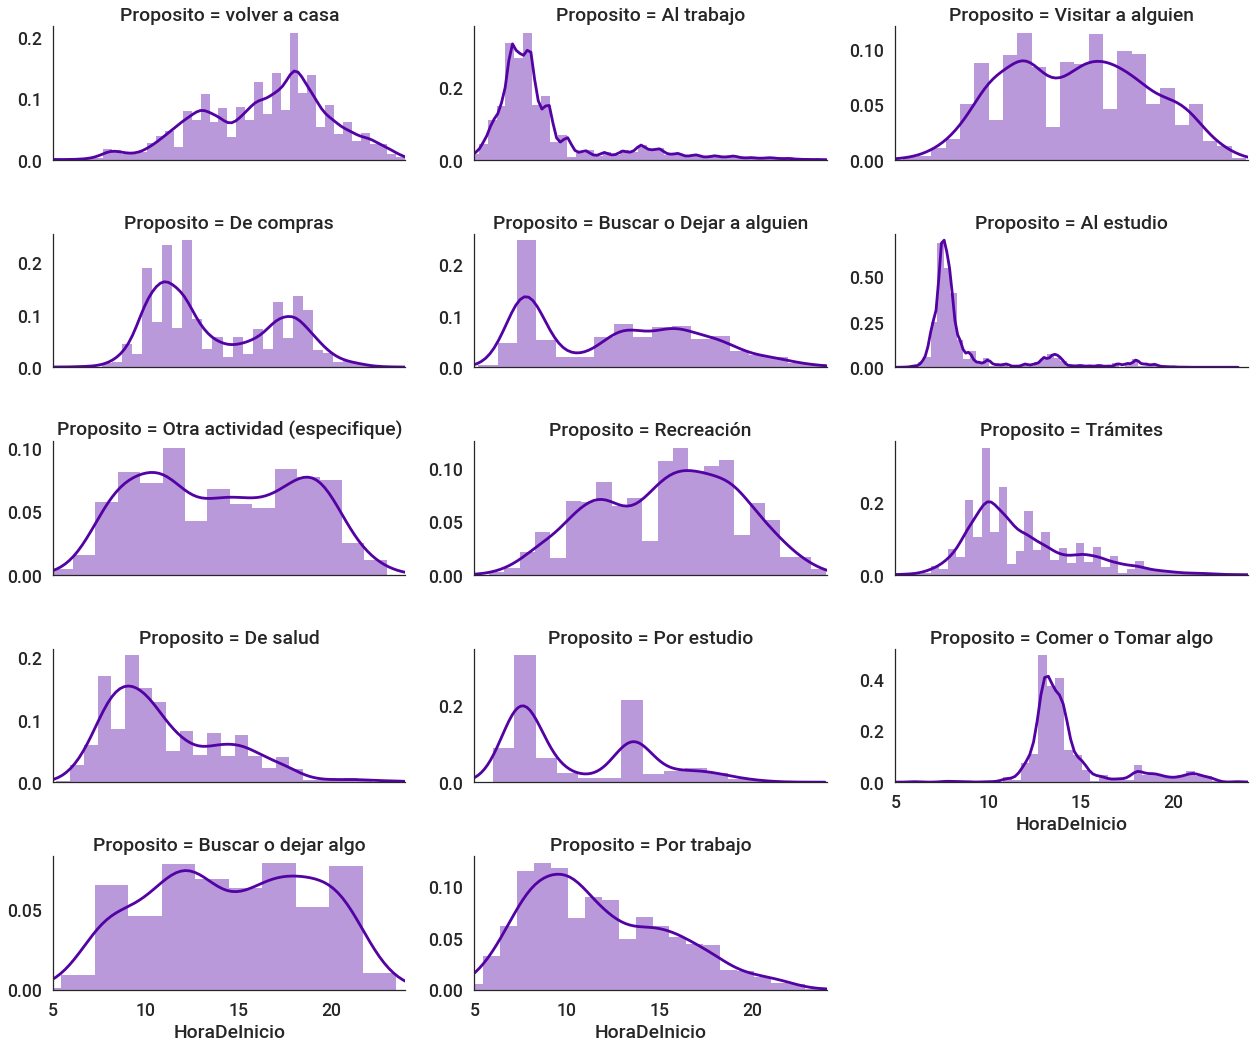

In [54]:
g = sns.FacetGrid(data=viajes, col='Proposito', col_wrap=3, aspect=2, sharey=False)
g.map(sns.distplot, 'HoraDeInicio')
g.set(xlim=[5,24])

¡Qué bien! Podemos encontrar muchas historias para contar y análisis para realizar sobre estos gráficos.

El siguiente paso es poder desagregar más aún, utilizando variables del DataFrame `personas`.

Para ello debemos hacer un `join` entre tablas.

El primer paso es elegir cuáles variables nos interesan. Lo hacemos del siguiente modo, con el operador `loc` de un `DataFrame`:

In [55]:
personas_columnas = personas.loc[:,('Sexo', 'TramoIngreso', 'Ocupacion', 'JornadaTrabajo')]
personas_columnas.head()

,Sexo,TramoIngreso,Ocupacion,JornadaTrabajo
Persona,,,,
10001001,Hombre,Entre 200.001 y 400.000 pesos,Empleado u obrero del sector privado,Jornada completa (40 o más horas semanales)
10001002,Mujer,NaN,NaN,NaN
10001003,Mujer,Entre 200.001 y 400.000 pesos,Empleado u obrero del sector privado,Jornada completa (40 o más horas semanales)
10002001,Hombre,Menos de 200.000 pesos,NaN,NaN
10002002,Mujer,Menos de 200.000 pesos,Empleado u obrero del sector privado,Jornada completa (40 o más horas semanales)


Procedemos a hacer el cruce de los `DataFrames` con el método `join`, que, por cada fila en `viajes`, va a tomar el valor de la columna `Persona`, y luego buscará en `personas_columnas` la fila correspondiente a esa persona. Los campos que elegimos serán anexados a `viajes`. Como el resultado es un nuevo `DataFrame`, lo que haremos será asignar ese resultado a la misma variable que teníamos antes:

In [56]:
viajes = viajes.join(personas_columnas, on='Persona')
viajes.head()

,Hogar,Persona,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,...,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,HoraDeInicio,Sexo,TramoIngreso,Ocupacion,JornadaTrabajo
Viaje,,,,,,,,,,,,,,,,,,,,,
1734310202,173431,17343102,1,Maipú,Maipú,Poniente,Poniente,400,407,335208.7188,...,NaN,NaN,NaN,NaN,0.0,22.5,Mujer,NaN,NaN,NaN
1734410101,173441,17344101,2,Maipú,Las Condes,Poniente,Oriente,407,307,338536.4375,...,NaN,NaN,NaN,NaN,0.0,13.0,Hombre,Entre 200.001 y 400.000 pesos,Empleado u obrero del sector privado,Jornada completa (40 o más horas semanales)
1734410102,173441,17344101,2,Las Condes,Maipú,Oriente,Poniente,307,407,354267.3438,...,NaN,NaN,NaN,NaN,0.0,22.0,Hombre,Entre 200.001 y 400.000 pesos,Empleado u obrero del sector privado,Jornada completa (40 o más horas semanales)
1734410301,173441,17344103,2,Maipú,Ñuñoa,Poniente,Oriente,407,437,338536.4375,...,NaN,NaN,NaN,NaN,0.0,9.0,Mujer,No contesta,Empleado u obrero del sector privado,Jornada completa (40 o más horas semanales)
1734410302,173441,17344103,2,Ñuñoa,Maipú,Oriente,Poniente,437,407,350841.6563,...,NaN,NaN,NaN,NaN,0.0,19.0,Mujer,No contesta,Empleado u obrero del sector privado,Jornada completa (40 o más horas semanales)


Ahora probemos la desagregación que queríamos hacer. Nuevamente utilizaremos la columna `Sexo`:

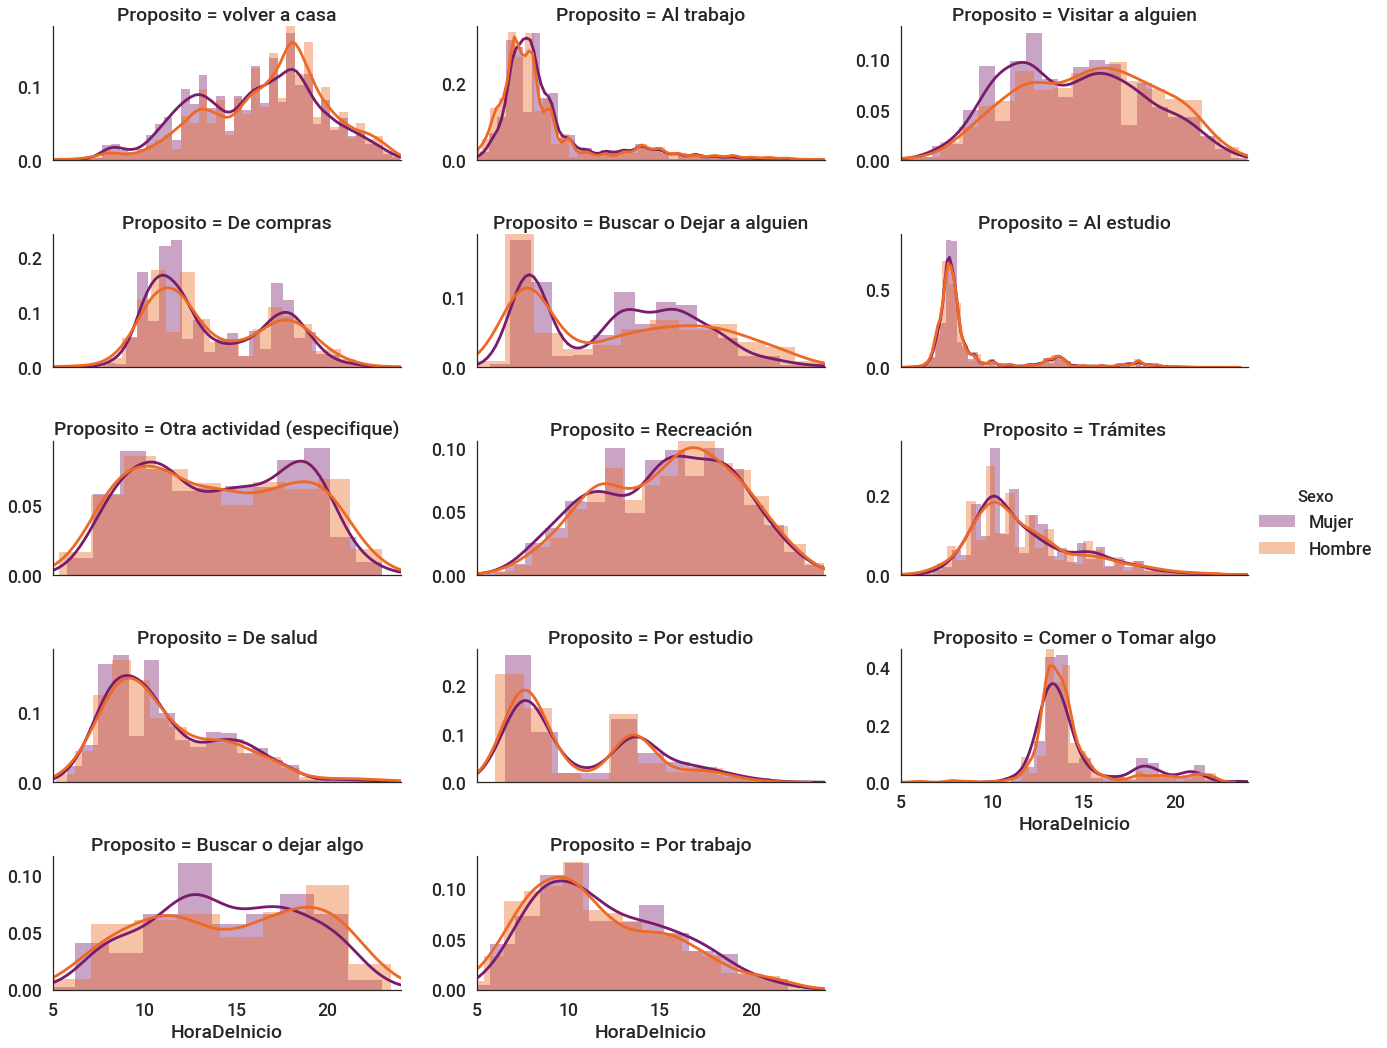

In [58]:
g = sns.FacetGrid(data=viajes, col='Proposito', col_wrap=3, aspect=2, sharey=False, hue='Sexo', palette='inferno')
g.map(sns.distplot, 'HoraDeInicio')
g.set(xlim=[5,24])
g.add_legend()

Oh, aquí hay muchas diferencias interesantes. Les invito a encontrar historias para contar en este gráfico :)

### Flujos entre comunas

Una pregunta que podemos hacernos es encontrar los flujos entre comunas. ¿De dónde hacia dónde se mueve la gente? Para ello no basta con las operaciones que hemos visto, sino que debemos realizar una [agregación](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) a través del método `groupby`. Lo haremos pidiéndole que cuente todos los viajes entre cada combinación posible (de las presentes en los datos) de `ComunaOrigen` y `ComunaDestino`:

In [59]:
flujos = viajes.groupby(['ComunaOrigen', 'ComunaDestino']).count()
flujos.sample(10)

,,Hogar,Persona,Etapas,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,OrigenCoordY,DestinoCoordX,...,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CodigoTiempo,HoraDeInicio,Sexo,TramoIngreso,Ocupacion,JornadaTrabajo
ComunaOrigen,ComunaDestino,,,,,,,,,,,,,,,,,,,,,
Conchalí,Puente Alto,11,11,11,11,11,11,11,11,11,11,...,3,0,1,3,4,11,11,7,6,6
Ñuñoa,San Miguel,21,21,21,21,21,21,21,21,21,21,...,1,0,3,0,17,21,21,11,9,9
La Cisterna,La Cisterna,619,619,619,619,619,619,619,398,398,398,...,19,54,116,22,408,619,619,357,201,201
Quilicura,Maipú,35,35,35,35,35,35,35,35,35,35,...,8,1,7,0,19,35,35,27,25,25
La Florida,Renca,10,10,10,10,10,10,10,10,10,10,...,2,1,0,0,7,10,10,9,8,8
Renca,Lampa,7,7,7,7,7,7,7,7,7,7,...,2,1,0,0,4,7,7,6,6,6
La Cisterna,Ñuñoa,13,13,13,13,13,13,13,13,13,13,...,1,0,2,1,9,13,13,12,10,10
Las Condes,Ñuñoa,227,227,227,227,227,227,227,227,227,227,...,17,6,28,1,175,227,227,180,151,151
Santiago,Peñalolén,150,150,150,150,150,150,150,150,150,150,...,7,2,26,14,101,150,150,117,92,92


Como le dijimos a la agregación que hiciera un conteo (a través de `count`) todas las variables tienen el mismo valor: el conteo es el mismo para todas. Pero existen otras operaciones que se pueden realizar y que pueden ver en la documentación.

¿Cómo visualizamos esto? Lo ideal sería tener una matriz, donde las filas son las comunas de origen y las columnas las comunas de destino. Eso es lo que se conoce como **matriz origen-destino**. Para ello debemos hacer una operación llamada `pivot_table`:

In [60]:
flujos_comunales = pd.pivot_table(flujos.reset_index(), index='ComunaOrigen', columns='ComunaDestino', values='Persona')

In [61]:
flujos_comunales.sample(10)

ComunaDestino,Calera de Tango,Cerrillos,Cerro Navia,Colina,Conchalí,El Bosque,Estación Central,Huechuraba,Independencia,La Cisterna,...,Recoleta,Renca,San Bernardo,San Joaquín,San Miguel,San Ramón,Santiago,Talagante,Vitacura,Ñuñoa
ComunaOrigen,,,,,,,,,,,,,,,,,,,,,
Peñaflor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Estación Central,5.0,59.0,21.0,9.0,14.0,15.0,768.0,14.0,8.0,15.0,...,19.0,31.0,28.0,11.0,4.0,4.0,201.0,NaN,9.0,32.0
Pedro Aguirre Cerda,3.0,28.0,3.0,3.0,NaN,5.0,25.0,3.0,4.0,20.0,...,6.0,8.0,9.0,9.0,137.0,2.0,127.0,NaN,1.0,11.0
Macul,3.0,3.0,4.0,1.0,3.0,4.0,8.0,1.0,6.0,12.0,...,5.0,4.0,19.0,31.0,16.0,7.0,135.0,NaN,16.0,163.0
Vitacura,1.0,5.0,5.0,8.0,8.0,6.0,13.0,22.0,8.0,2.0,...,20.0,13.0,8.0,4.0,7.0,2.0,93.0,NaN,614.0,40.0
Peñalolén,2.0,3.0,7.0,1.0,9.0,3.0,12.0,13.0,9.0,9.0,...,11.0,7.0,10.0,9.0,10.0,6.0,148.0,NaN,22.0,202.0
Colina,1.0,2.0,4.0,1477.0,12.0,4.0,16.0,7.0,21.0,NaN,...,32.0,3.0,3.0,NaN,10.0,2.0,63.0,NaN,5.0,8.0
Independencia,1.0,3.0,3.0,21.0,124.0,7.0,6.0,44.0,603.0,8.0,...,94.0,41.0,19.0,4.0,7.0,6.0,129.0,NaN,7.0,13.0
Pirque,NaN,NaN,1.0,1.0,NaN,2.0,1.0,1.0,NaN,3.0,...,NaN,NaN,5.0,1.0,2.0,NaN,19.0,NaN,2.0,3.0


Eso ya lo podemos empezar a visualizar de manera interesante. Noten que hay varios `NaN` en el nuevo `DataFrame`: esto se debe a que esa combinación de comuna O/D no está presente. Podemos llenarla con ceros, puesto que el significado es el mismo: no hay viajes.

In [62]:
flujos_comunales.fillna(0, inplace=True)

Ahora utilicemos el método `sns.heatmap` para visualizar la matriz:

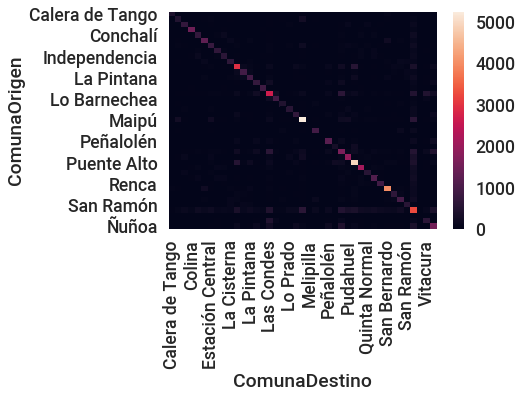

In [63]:
sns.heatmap(flujos_comunales)

Uhm, no es muy bonito. Veamos si podemos configurarla mejor:

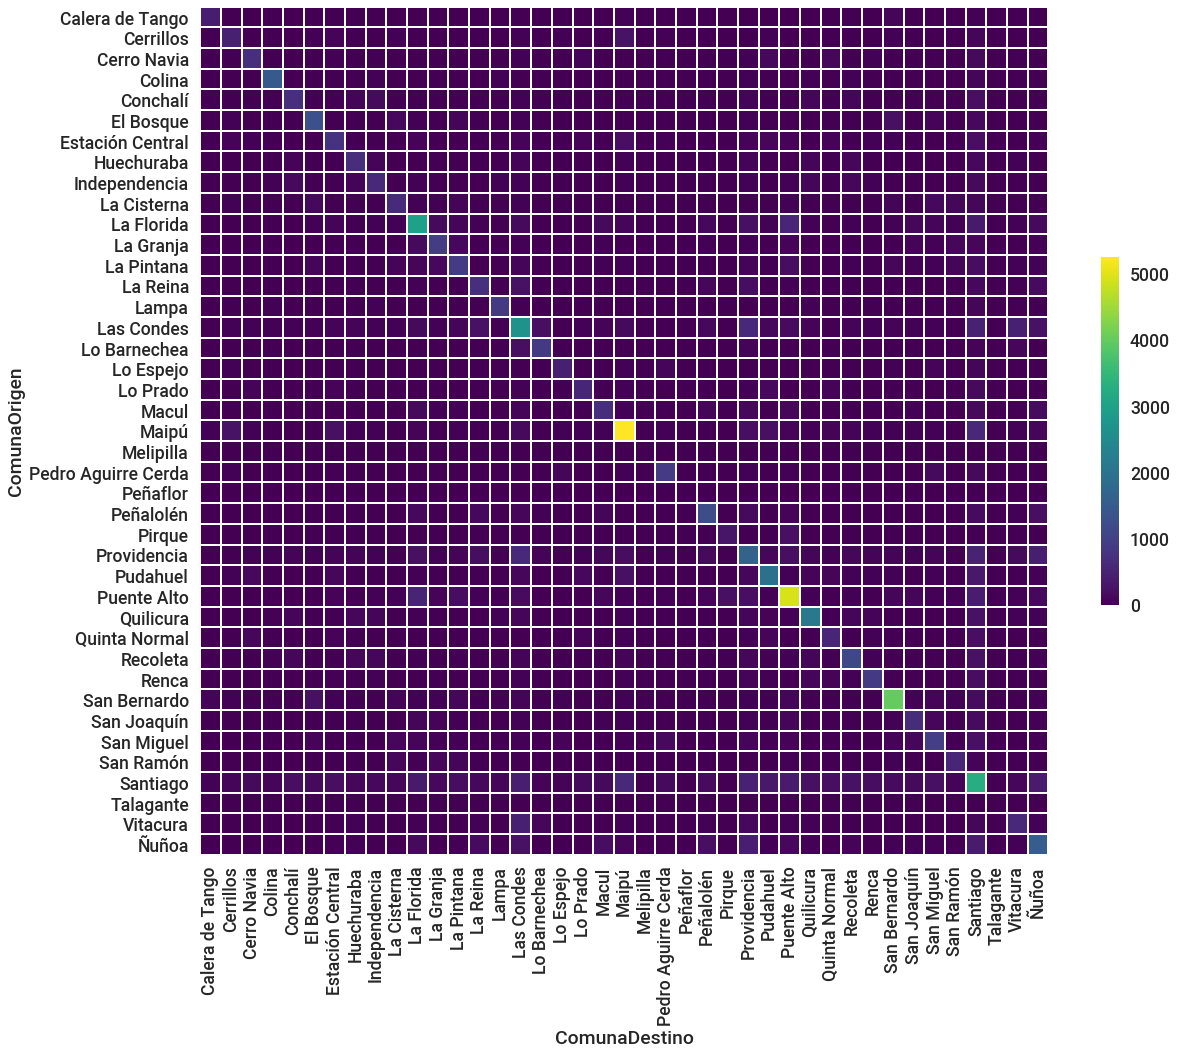

In [64]:
plt.figure(figsize=(19, 16))
sns.heatmap(flujos_comunales, cmap='viridis', square=True, linewidths=1, cbar_kws={'shrink': 0.4})

Mucho mejor, ¿no? Sin embargo, podríamos preguntarnos si queremos ver flujos relativos (por ejemplo, cuál es la fracción de gente de Ñuñoa que viaja a Recoleta) en vez de absolutos. Lo podemos hacer normalizando la matriz:

In [65]:
normalize(flujos_comunales, norm='l1', axis=1, copy=False)

array([[  6.82291667e-01,   6.94444444e-03,   1.73611111e-03, ...,
          0.00000000e+00,   1.73611111e-03,   8.68055556e-03],
       [  3.25467860e-03,   3.80797396e-01,   4.06834825e-03, ...,
          0.00000000e+00,   4.88201790e-03,   9.76403580e-03],
       [  7.53579503e-04,   4.52147702e-03,   5.33534288e-01, ...,
          0.00000000e+00,   3.01431801e-03,   8.28937453e-03],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  5.50964187e-04,   2.75482094e-03,   2.75482094e-03, ...,
          0.00000000e+00,   3.38292011e-01,   2.20385675e-02],
       [  1.03869125e-03,   2.59672812e-03,   2.59672812e-03, ...,
          0.00000000e+00,   9.86756687e-03,   3.96520384e-01]])

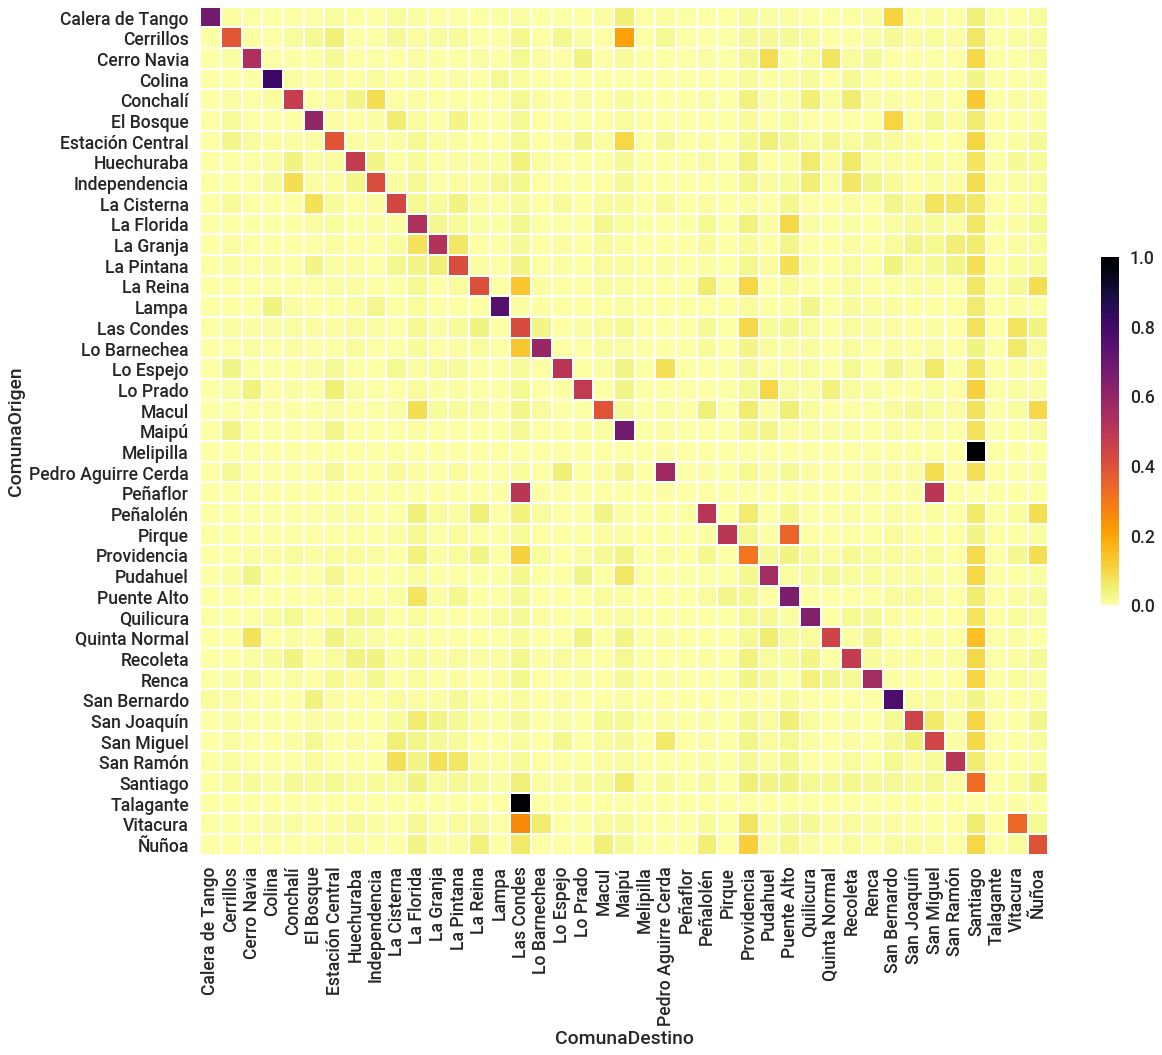

In [66]:
plt.figure(figsize=(19, 16))
sns.heatmap(flujos_comunales, cmap='inferno_r', square=True, linewidths=1, cbar_kws={'shrink': 0.4})

Ahora bien, esta matriz incluye todos los viajes del dataset. ¿Qué pasa si queremos ver un conjunto filtrado, por ejemplo, por propósito de viaje? 

Podemos repetir lo que hicimos antes y generalizarlo en una función. Esta función recibe un `DataFrame` ya filtrado como parámetro, y luego de eso genera y visualiza la matriz:

In [71]:
def visualize_flow(dataframe):
    flujos = dataframe.groupby(['ComunaOrigen', 'ComunaDestino']).aggregate({'Persona': 'count'}).reset_index()
    flujos_comunales = pd.pivot_table(flujos, index='ComunaOrigen', columns='ComunaDestino', values='Persona').fillna(0)
    normalize(flujos_comunales, norm='l2', axis=1, copy=False)
    plt.figure(figsize=(19, 16))
    sns.heatmap(flujos_comunales, cmap='inferno_r', square=True, linewidths=1, cbar_kws={'shrink': 0.4})

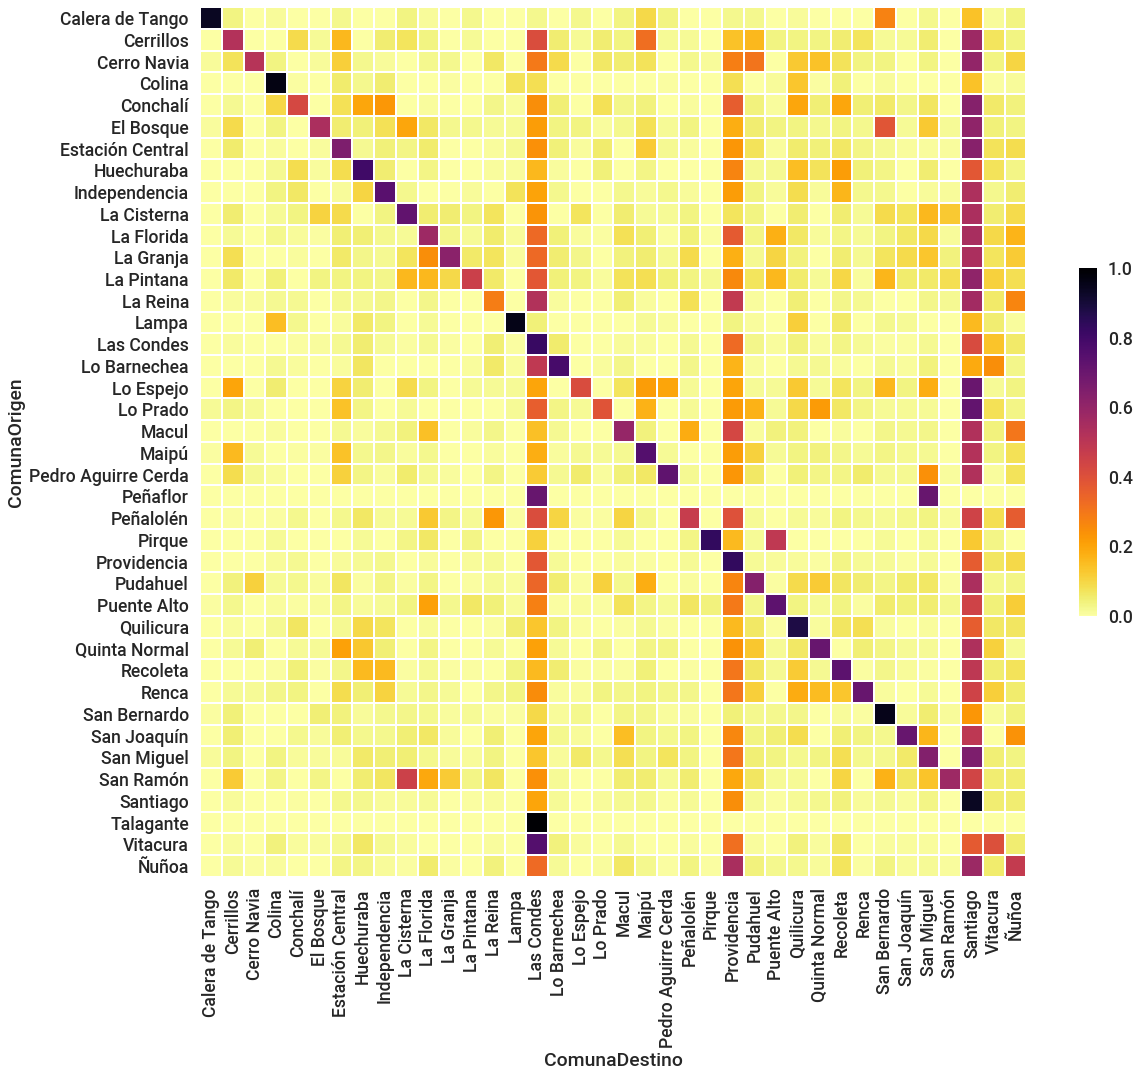

In [72]:
visualize_flow(viajes[viajes['Proposito'] == 'Al trabajo'])

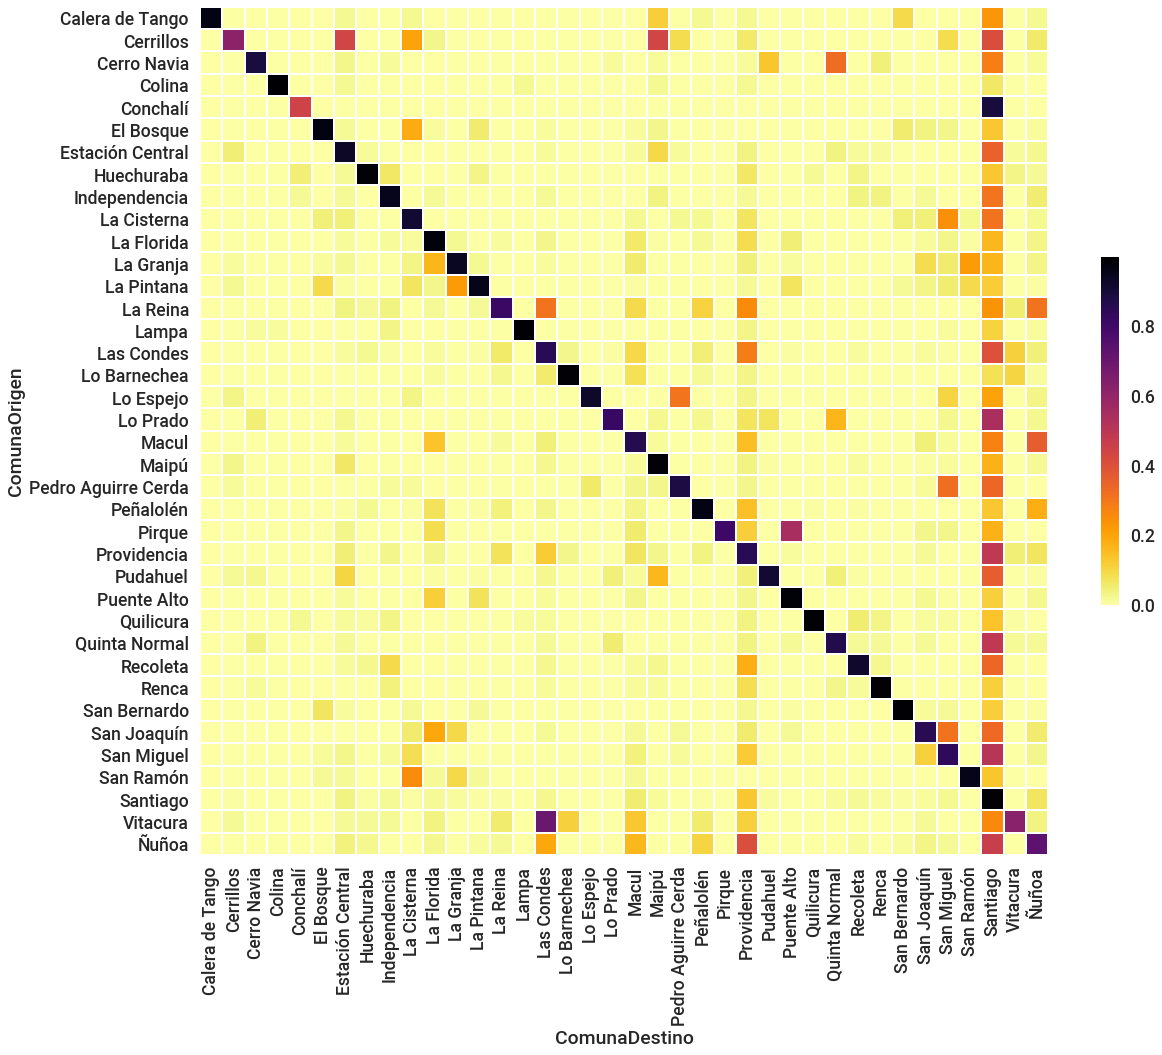

In [73]:
visualize_flow(viajes[viajes['Proposito'] == 'Al estudio'])

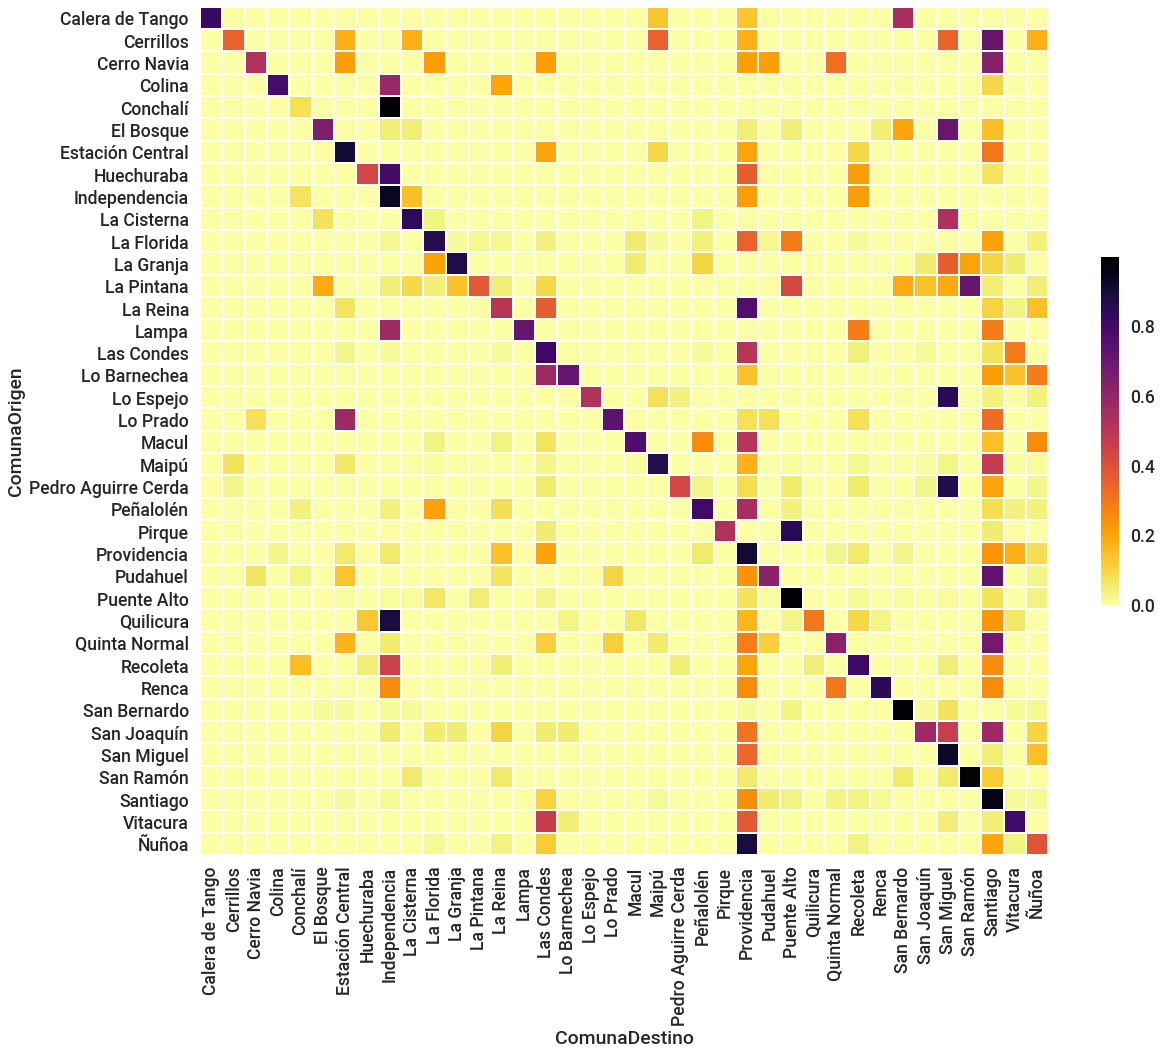

In [74]:
visualize_flow(viajes[viajes['Proposito'] == 'De salud'])

Dejamos el análisis del resultado como ejercicio propuesto. Pero aquí hay varias cosas que se pueden hacer:

  * Encontrar patrones y diferencias en las matrices.
  * Definir si es necesario y útil establecer un orden en la visualización de las matrices. Por ejemplo, un criterio para ordenar las filas y las columnas.
  
Y respecto a análisis de datos, algunas posibles operaciones son:

  * Buscar correlaciones entre variables.
  * Cruzar los datos de las personas y viajes con datos de residencia (el archivo `hogares.csv`).
  * Utilizar la georeferencia de los viajes y visualizarlos en un mapa (recuerden el ejercicio anterior).